In [4]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [5]:
from google.colab import files

print("Upload the TRADER dataset CSV:")
uploaded_trader = files.upload()

print("Upload the FEAR-GREED dataset CSV:")
uploaded_sentiment = files.upload()


Upload the TRADER dataset CSV:


Saving historical_data.csv to historical_data (1).csv
Upload the FEAR-GREED dataset CSV:


Saving fear_greed_index.csv to fear_greed_index (1).csv


In [6]:
trader_file = list(uploaded_trader.keys())[0]
sentiment_file = list(uploaded_sentiment.keys())[0]


In [7]:
# Load data
df_trader = pd.read_csv(trader_file)
df_sentiment = pd.read_csv(sentiment_file)

# Show previews
df_trader.head(), df_sentiment.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [10]:
# Convert timestamp IST column
df_trader['timestamp_ist'] = pd.to_datetime(
    df_trader['Timestamp IST'],
    format="%d-%m-%Y %H:%M",
    errors='coerce'
)

# Extract date
df_trader['date'] = df_trader['timestamp_ist'].dt.date



In [12]:
# Convert date column to datetime
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'], errors='coerce')

# Clean classification text
df_sentiment['classification'] = df_sentiment['classification'].str.strip().str.title()



In [13]:
print("TRADER DATASET INFO:")
print(df_trader.info())
print("\n---\n")

print("SENTIMENT DATASET INFO:")
print(df_sentiment.info())


TRADER DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  flo

In [15]:
# Trader dataframe
df_trader = df_trader.dropna(
    subset=['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Side', 'date']
)

# Sentiment dataframe
df_sentiment = df_sentiment.dropna(subset=['date', 'classification'])


In [16]:
df_trader.to_csv("clean_trader_data.csv", index=False)
df_sentiment.to_csv("clean_sentiment_data.csv", index=False)

print("Cleaned files saved successfully!")


Cleaned files saved successfully!


In [17]:
files.download("clean_trader_data.csv")
files.download("clean_sentiment_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
print("Trader Dataset Shape:", df_trader.shape)
print("Sentiment Dataset Shape:", df_sentiment.shape)

df_trader.head(), df_sentiment.head()


Trader Dataset Shape: (211224, 18)
Sentiment Dataset Shape: (2644, 4)


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [19]:
df_trader.describe(include='all')


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp_ist,date
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224,2.112240e+05,211224,211224.000000,211224,2.112240e+05,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224
unique,32,246,NaN,NaN,NaN,2,27977,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN,NaN,480
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,14-02-2025 00:31,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN,NaN,2025-02-25
freq,40184,68005,NaN,NaN,NaN,108528,441,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN,NaN,6246
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,NaN,-2.994625e+04,NaN,48.749001,NaN,6.965388e+10,NaN,1.163967,5.628549e+14,1.737744e+12,2025-01-31 12:04:22.915009792,NaN
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,NaN,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12,2023-05-01 01:06:00,NaN
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,NaN,-3.762311e+02,NaN,0.000000,NaN,5.983853e+10,NaN,0.016121,2.810000e+14,1.740000e+12,2024-12-31 21:00:45,NaN
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,NaN,8.472793e+01,NaN,0.000000,NaN,7.442939e+10,NaN,0.089578,5.620000e+14,1.740000e+12,2025-02-24 18:55:00,NaN
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,NaN,9.337278e+03,NaN,5.792797,NaN,8.335543e+10,NaN,0.393811,8.460000e+14,1.740000e+12,2025-04-02 18:22:00,NaN
max,NaN,NaN,109004.000000,1.582244e+07,3.921431e+06,NaN,NaN,3.050948e+07,NaN,135329.090100,NaN,9.014923e+10,NaN,837.471593,1.130000e+15,1.750000e+12,2025-05-01 12:13:00,NaN


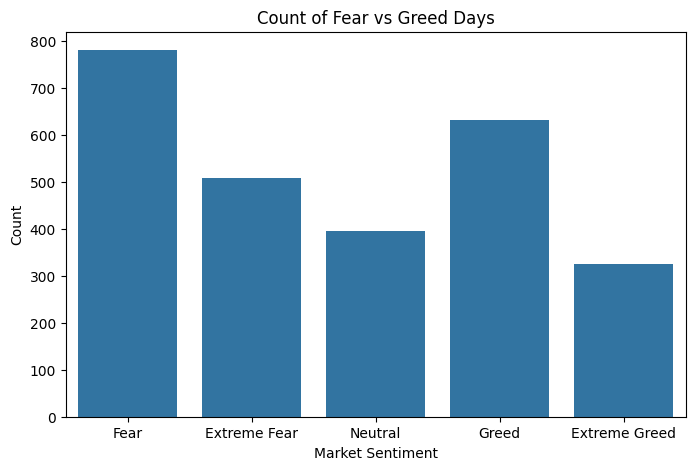

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_sentiment, x='classification')
plt.title("Count of Fear vs Greed Days")
plt.xlabel("Market Sentiment")
plt.ylabel("Count")
plt.show()


In [23]:
import os
os.makedirs("outputs", exist_ok=True)

plt.savefig("outputs/sentiment_distribution.png")


<Figure size 640x480 with 0 Axes>

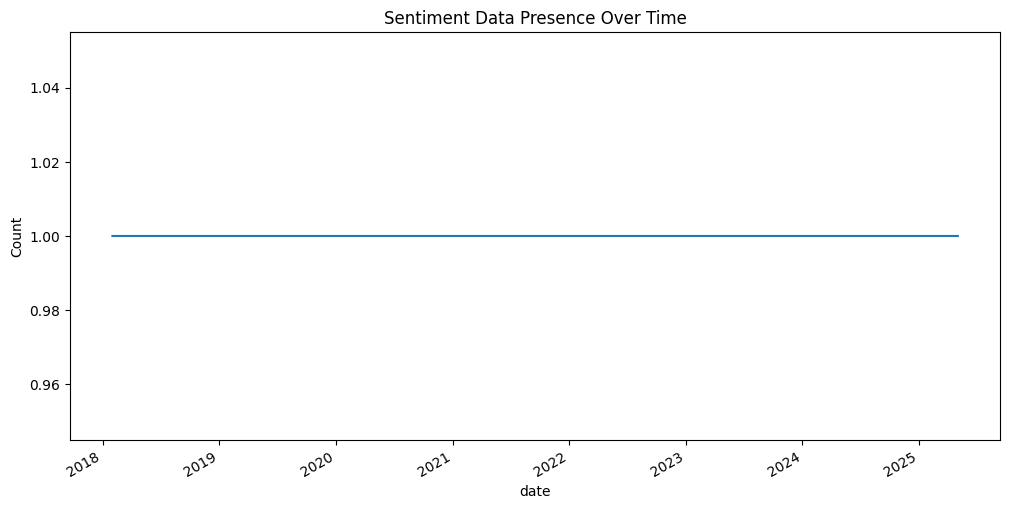

In [24]:
plt.figure(figsize=(12,6))
df_sentiment.groupby('date').size().plot()
plt.title("Sentiment Data Presence Over Time")
plt.ylabel("Count")
plt.show()


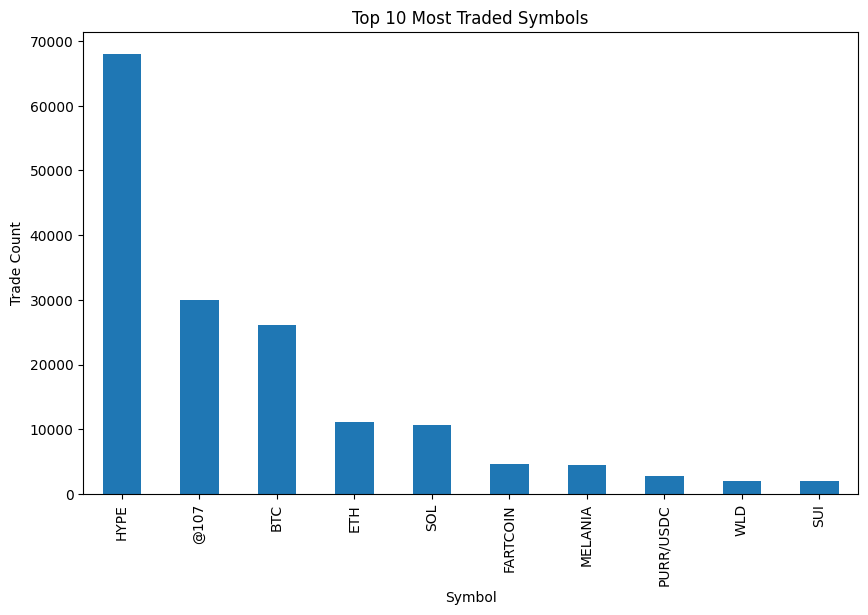

In [27]:
plt.figure(figsize=(10,6))
df_trader['Coin'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Traded Symbols")
plt.xlabel("Symbol")
plt.ylabel("Trade Count")
plt.show()


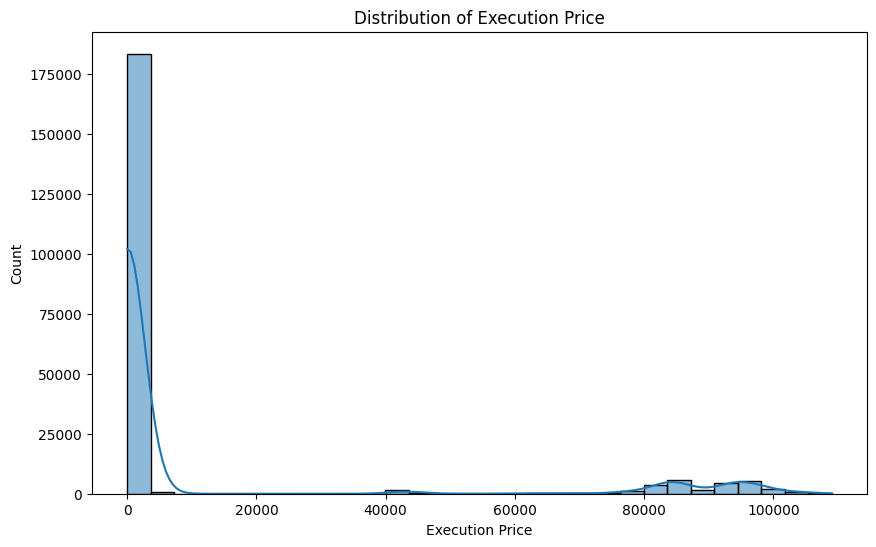

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df_trader['Execution Price'], bins=30, kde=True)
plt.title("Distribution of Execution Price")
plt.xlabel("Execution Price")
plt.show()


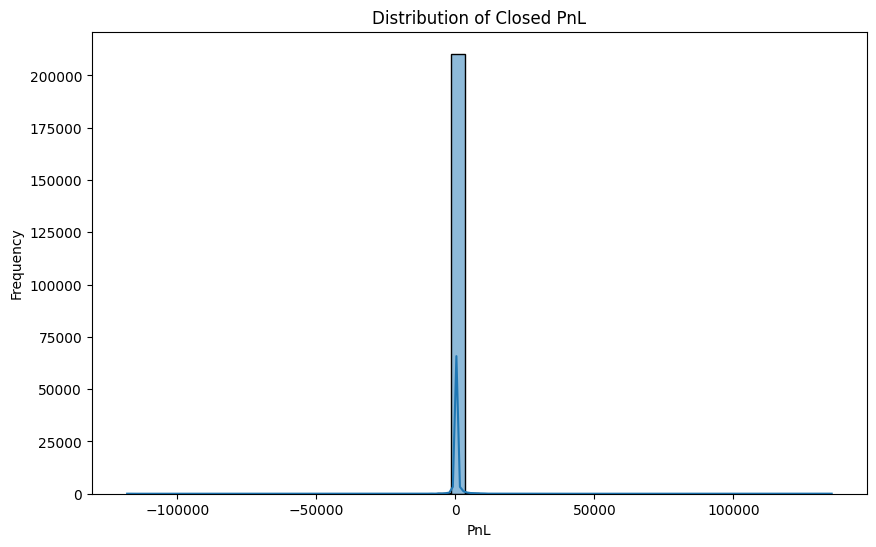

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df_trader['Closed PnL'], bins=50, kde=True)
plt.title("Distribution of Closed PnL")
plt.xlabel("PnL")
plt.ylabel("Frequency")
plt.show()



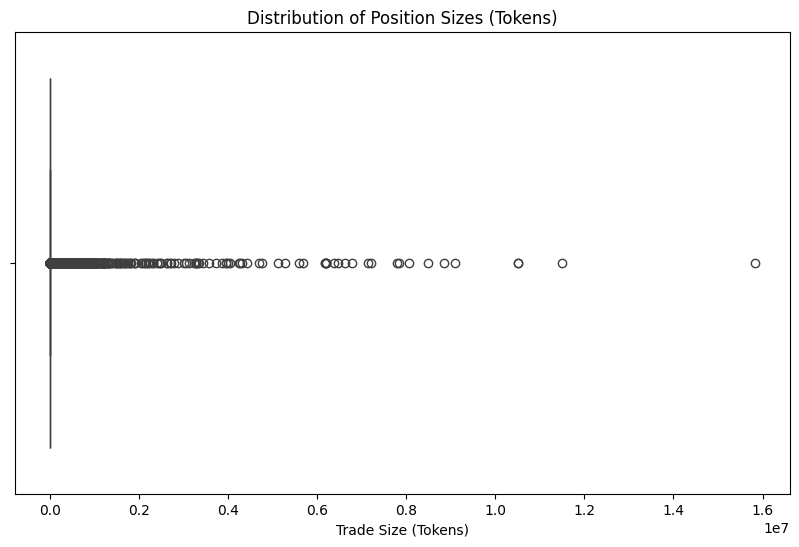

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_trader['Size Tokens'])
plt.title("Distribution of Position Sizes (Tokens)")
plt.xlabel("Trade Size (Tokens)")
plt.show()


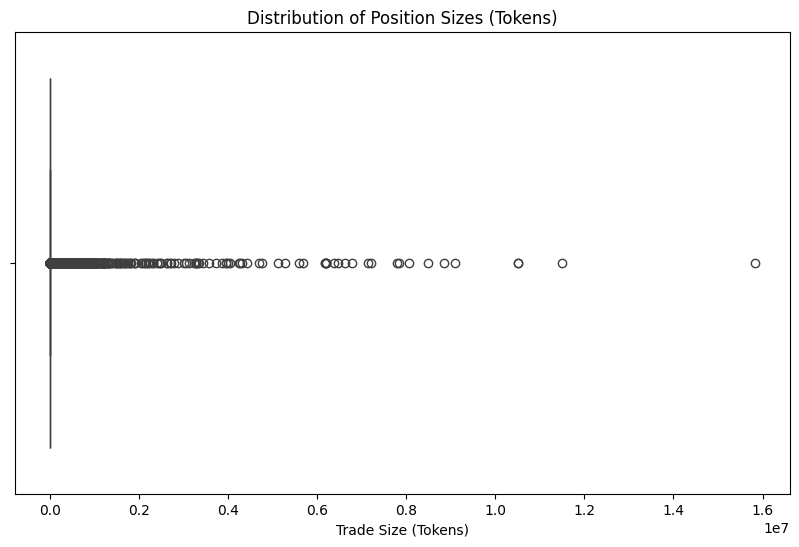

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_trader['Size Tokens'])
plt.title("Distribution of Position Sizes (Tokens)")
plt.xlabel("Trade Size (Tokens)")
plt.show()


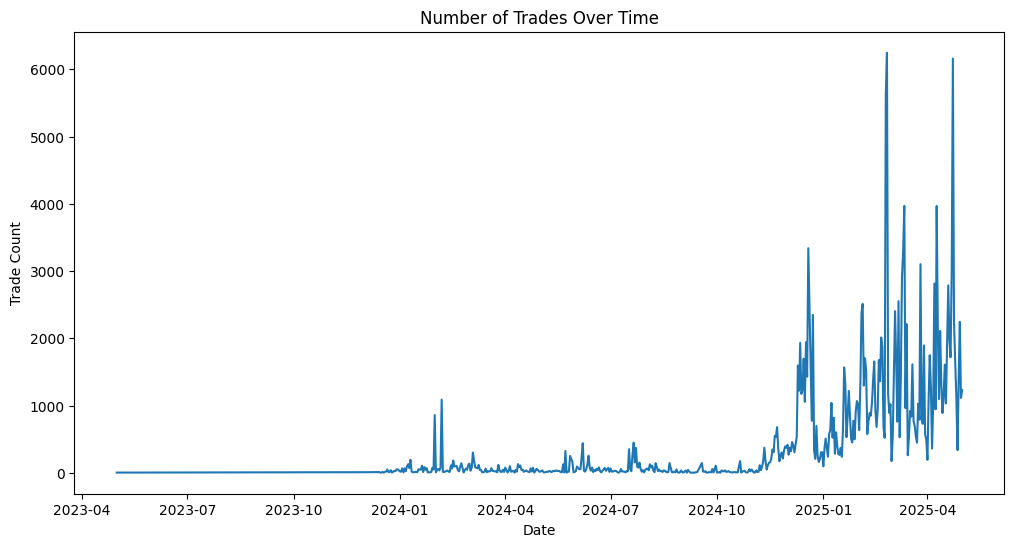

In [37]:
df_trader['date'] = pd.to_datetime(df_trader['date'])

daily_trades = df_trader.groupby('date').size()

plt.figure(figsize=(12,6))
plt.plot(daily_trades)
plt.title("Number of Trades Over Time")
plt.ylabel("Trade Count")
plt.xlabel("Date")
plt.show()


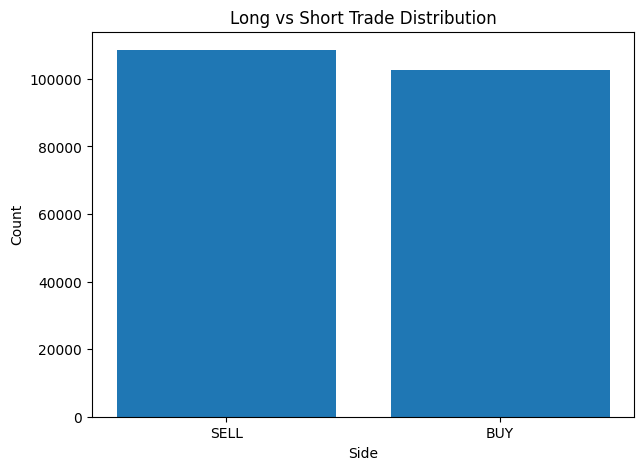

In [39]:
plt.figure(figsize=(7,5))

counts = df_trader['Side'].value_counts()

plt.bar(counts.index, counts.values)

plt.title("Long vs Short Trade Distribution")
plt.xlabel("Side")
plt.ylabel("Count")

plt.show()



In [40]:
import os

def save_fig(filename):
    os.makedirs("outputs", exist_ok=True)
    plt.savefig(f"outputs/{filename}", dpi=300, bbox_inches="tight")


In [41]:
save_fig("leverage_distribution.png")


<Figure size 640x480 with 0 Axes>

In [42]:
df_merged = pd.merge(
    df_trader,
    df_sentiment,
    on='date',
    how='left'
)

df_merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp_ist,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [44]:
df_merged['classification'].isna().sum()


np.int64(6)

In [48]:
df_merged['classification'] = df_merged['classification'].fillna("Unknown")



In [55]:
size_analysis = df_merged.groupby('classification')['Size Tokens'].mean()
size_analysis


,Size Tokens
classification,
Extreme Fear,1675.893319
Extreme Greed,8832.415746
Fear,2992.641845
Greed,4715.327756
Neutral,4383.368714
Unknown,5466.251667


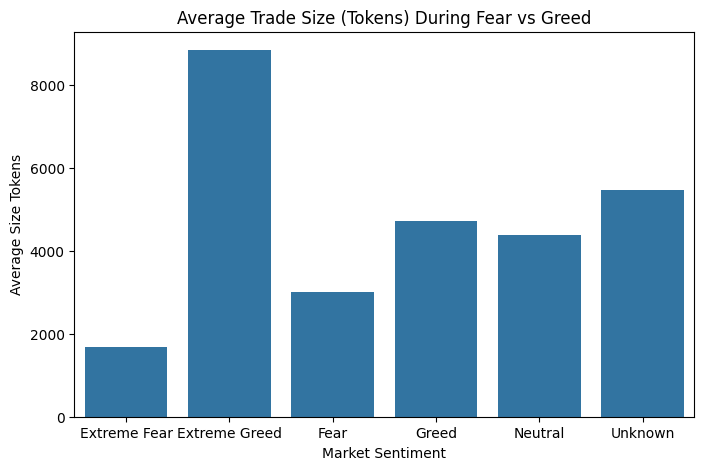

In [56]:
size_analysis = df_merged.groupby('classification')['Size Tokens'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=size_analysis.index, y=size_analysis.values)
plt.title("Average Trade Size (Tokens) During Fear vs Greed")
plt.ylabel("Average Size Tokens")
plt.xlabel("Market Sentiment")
plt.show()


In [57]:
pnl_analysis = df_merged.groupby('classification')['Closed PnL'].mean()
pnl_analysis


,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718
Unknown,7078.665688


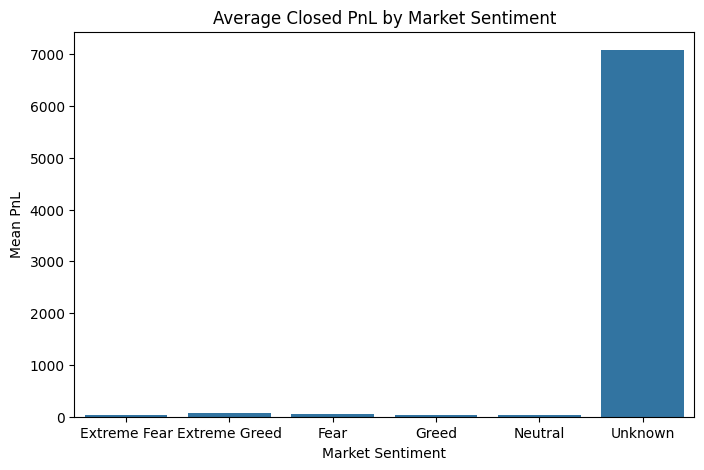

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x=pnl_analysis.index, y=pnl_analysis.values)
plt.title("Average Closed PnL by Market Sentiment")
plt.ylabel("Mean PnL")
plt.xlabel("Market Sentiment")
plt.show()


In [59]:
side_sentiment = df_merged.groupby(['classification', 'Side']).size().unstack()


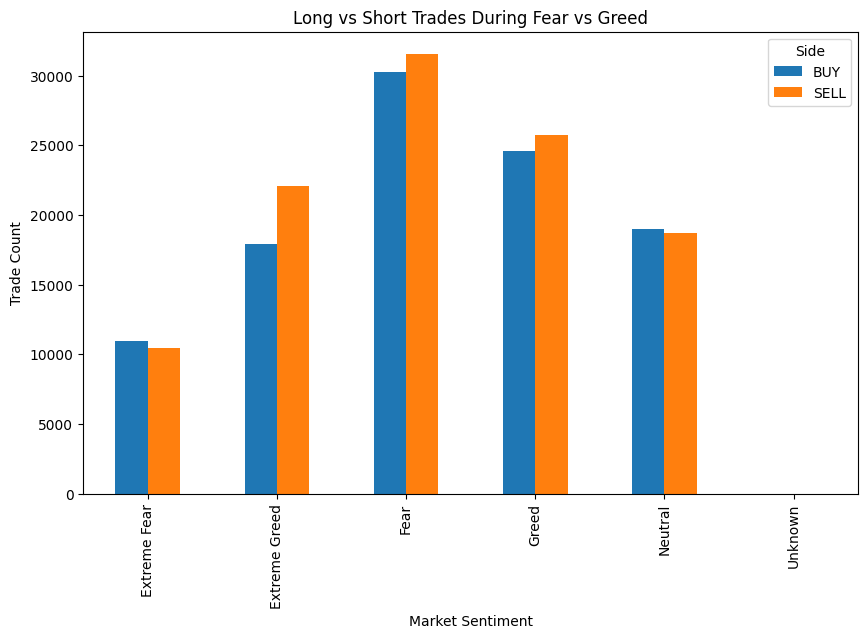

In [60]:
side_sentiment.plot(kind='bar', figsize=(10,6))
plt.title("Long vs Short Trades During Fear vs Greed")
plt.ylabel("Trade Count")
plt.xlabel("Market Sentiment")
plt.show()


In [62]:
df_merged.head(10)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp_ist,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [63]:
df_merged['leverage'] = df_merged['Size USD'] / 2500


In [64]:
bins = [0, 3, 5, 10, 20, 50, 200]
labels = ["0-3x", "3-5x", "5-10x", "10-20x", "20-50x", "50-200x"]

df_merged['leverage_bucket'] = pd.cut(df_merged['leverage'], bins=bins, labels=labels)


In [65]:
risk_behavior = df_merged.groupby(['classification', 'leverage_bucket']).size().unstack(fill_value=0)
risk_behavior


/tmp/ipython-input-3229410289.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_behavior = df_merged.groupby(['classification', 'leverage_bucket']).size().unstack(fill_value=0)


leverage_bucket,0-3x,3-5x,5-10x,10-20x,20-50x,50-200x
classification,,,,,,
Extreme Fear,18944,859,644,474,348,125
Extreme Greed,36662,1162,1068,726,322,38
Fear,53462,2897,2086,1546,1126,633
Greed,44315,1904,1807,1304,592,322
Neutral,34097,1242,1039,717,408,167
Unknown,2,1,1,2,0,0


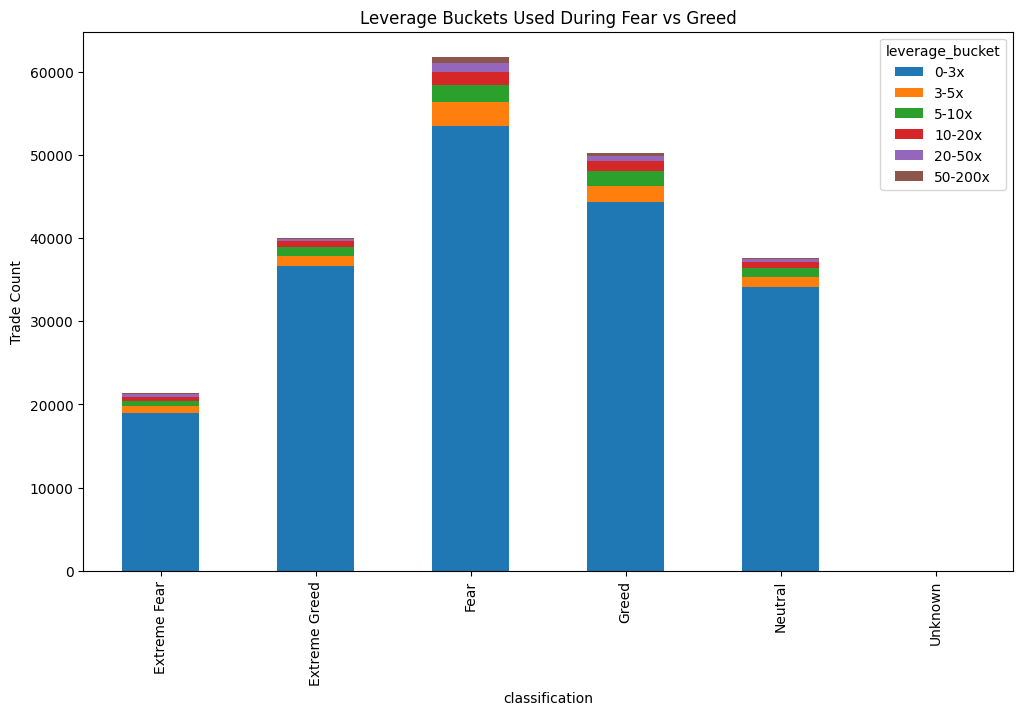

In [66]:
risk_behavior.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title("Leverage Buckets Used During Fear vs Greed")
plt.ylabel("Trade Count")
plt.show()


In [67]:
leverage_analysis = df_merged.groupby('classification')['leverage'].mean()
leverage_analysis


,leverage
classification,
Extreme Fear,2.139893
Extreme Greed,1.244901
Fear,3.126444
Greed,2.294754
Neutral,1.913093
Unknown,5.911257


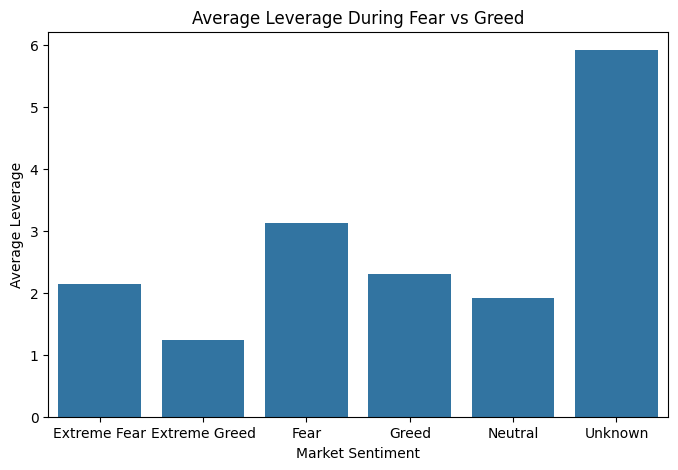

In [68]:
plt.figure(figsize=(8,5))
sns.barplot(x=leverage_analysis.index, y=leverage_analysis.values)
plt.title("Average Leverage During Fear vs Greed")
plt.ylabel("Average Leverage")
plt.xlabel("Market Sentiment")
plt.show()


In [69]:
save_fig("avg_leverage_by_sentiment.png")
save_fig("avg_size_by_sentiment.png")
save_fig("avg_pnl_by_sentiment.png")
save_fig("long_vs_short_by_sentiment.png")
save_fig("leverage_buckets_sentiment.png")


<Figure size 640x480 with 0 Axes>

In [70]:
print("🔍 INSIGHTS SUMMARY")
print("----------------------------------------")

print("1️⃣ Average Leverage by Sentiment:")
print(leverage_analysis)

print("\n2️⃣ Average Trade Size by Sentiment:")
print(size_analysis)

print("\n3️⃣ Profitability (PnL) by Sentiment:")
print(pnl_analysis)

print("\n4️⃣ Long vs Short Frequency:")
print(side_sentiment)

print("\n5️⃣ Leverage Risk Buckets:")
print(risk_behavior)


🔍 INSIGHTS SUMMARY
----------------------------------------
1️⃣ Average Leverage by Sentiment:
classification
Extreme Fear     2.139893
Extreme Greed    1.244901
Fear             3.126444
Greed            2.294754
Neutral          1.913093
Unknown          5.911257
Name: leverage, dtype: float64

2️⃣ Average Trade Size by Sentiment:
classification
Extreme Fear     1675.893319
Extreme Greed    8832.415746
Fear             2992.641845
Greed            4715.327756
Neutral          4383.368714
Unknown          5466.251667
Name: Size Tokens, dtype: float64

3️⃣ Profitability (PnL) by Sentiment:
classification
Extreme Fear       34.537862
Extreme Greed      67.892861
Fear               54.290400
Greed              42.743559
Neutral            34.307718
Unknown          7078.665688
Name: Closed PnL, dtype: float64

4️⃣ Long vs Short Frequency:
Side                BUY     SELL
classification                  
Extreme Fear    10935.0  10465.0
Extreme Greed   17940.0  22052.0
Fear            302